In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"
#include <TTreeReader.h>
#include <TTreeReaderArray.h>
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RNTupleDS.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [5]:
auto quality = df.Take<ROOT::VecOps::RVec<UChar_t>>("Puppi_quality").GetValue();
std::cout << quality[0];

{ 1, 0, 3, 0, 1, 0, 4, 0, 5, 0, 1, 0, 2, 0, 6, 0, 2, 0, 4, 0, 0, 0, 0, 0, 7, 0 }

In [1]:
ROOT::RDataFrame df("Events","tree-raw.root");
std::cout << "entries= " << *df.Count() << std::endl;
df.Describe()

entries= 594000
(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file tree-raw.root

Property                Value
--------                -----
Columns in total           14
Columns from defines        0
Event loops run             1
Processing slots            1

Column          Type                            Origin
------          ----                            ------
Puppi_dxy       ROOT::VecOps::RVec<Float_t>     Dataset
Puppi_eta       ROOT::VecOps::RVec<Float_t>     Dataset
Puppi_id        ROOT::VecOps::RVec<UChar_t>     Dataset
Puppi_pdgId     ROOT::VecOps::RVec<Short_t>     Dataset
Puppi_phi       ROOT::VecOps::RVec<Float_t>     Dataset
Puppi_pt        ROOT::VecOps::RVec<Float_t>     Dataset
Puppi_quality   ROOT::VecOps::RVec<UChar_t>     Dataset
Puppi_wpuppi    ROOT::VecOps::RVec<Float_t>     Dataset
Puppi_z0        ROOT::VecOps::RVec<Float_t>     Dataset
bx              UShort_t                        Dataset
good            Bool_t                          Datas

## Puppi Distribution

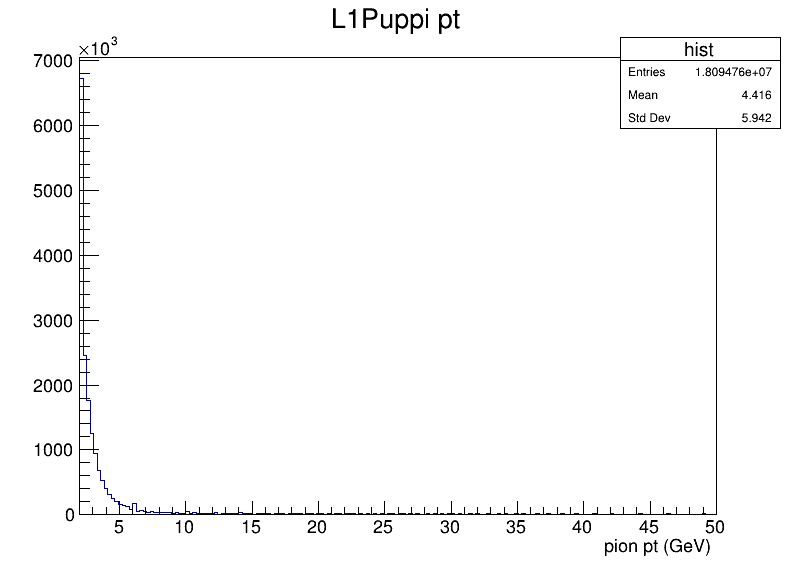

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [6]:
auto gen_pt   = df.Take<ROOT::VecOps::RVec<Float_t>>("Puppi_pt").GetValue();
std::vector<double> pts;

for (const auto& pti : gen_pt) {
    pts.insert(pts.end(), pti.begin(), pti.end());
}
int i=0;
TH1F* hist_genpt = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 180, 2, 50); //GeV
for (const auto &p : pts){
    hist_genpt->Fill(p);
    i++;
}

auto c1 = new TCanvas("c1", "c1", 800,600);
hist_genpt->Draw();
// c1->SetLogy();
c1->Draw();


## Events distribution

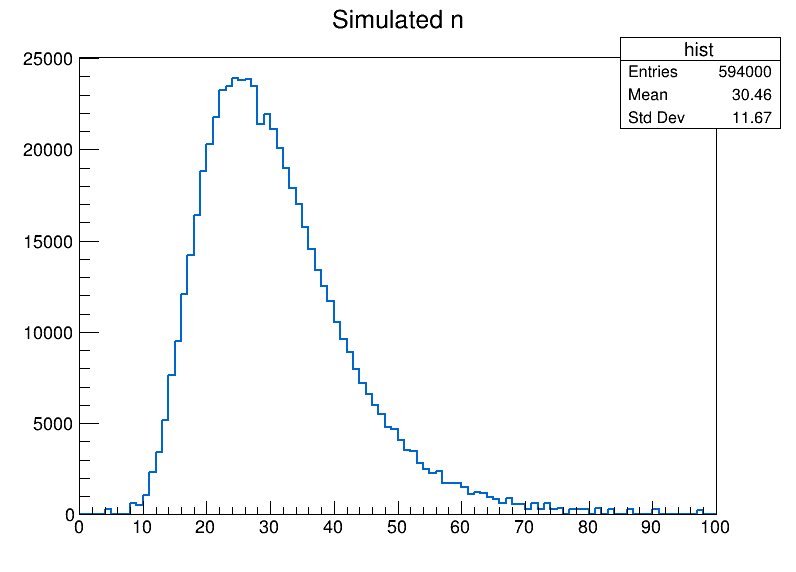

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [7]:
auto np = df.Take<UShort_t>("nPuppi").GetValue();
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : np){
    hist_n->Fill(n);
}
hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);

hist_n->Draw();
c1->Draw();

In [8]:
np[0]

(unsigned short) 26


## Compare trees

In [9]:
ROOT::RDataFrame df1("Events","tree1.root");
std::cout << "entries df1 = " << *df1.Count() << std::endl;

ROOT::RDataFrame df2("Events","tree2.root");
std::cout << "entries df2 = " << *df2.Count() << std::endl;

entries df1 = 594000
entries df2 = 594000


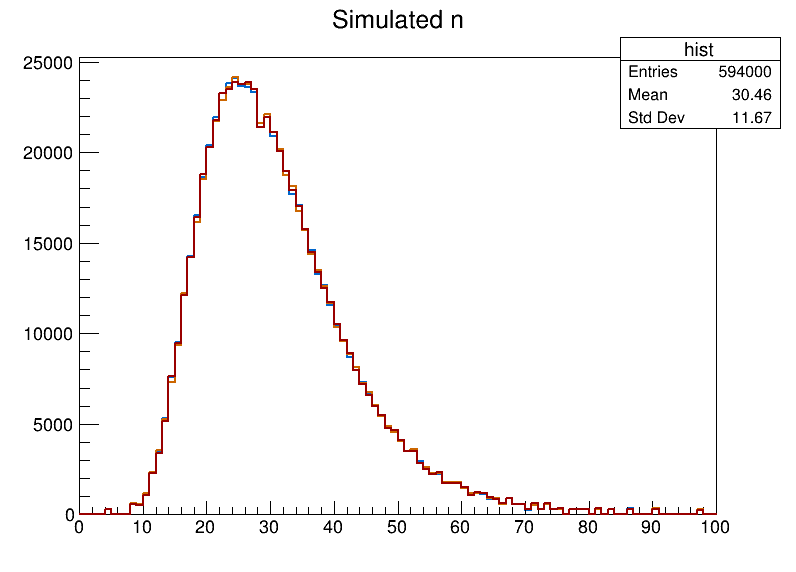

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [14]:
auto n1 = df1.Take<UShort_t>("nPuppi").GetValue();
auto n2 = df2.Take<UShort_t>("nPuppi").GetValue();
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n1 = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : n1){
    hist_n1->Fill(n);
}
TH1F* hist_n2 = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &nn : n2){
    hist_n2->Fill(nn);
}

hist_n1 -> SetLineColor(kAzure+2);
hist_n1 -> SetLineWidth(2);

hist_n2 -> SetLineColor(kOrange+2);
hist_n2 -> SetLineWidth(2);

hist_n -> SetLineColor(kRed+2);
hist_n -> SetLineWidth(2);

hist_n1->Draw();
hist_n2->Draw("same");
hist_n->Draw("same");
c1->Draw();

## Read RNTuple

In [7]:
ROOT::RDataFrame drn = ROOT::RDF::Experimental::FromRNTuple("Events", "RNTuple.root");
drn.Describe().Print()

Dataframe from datasource RNTupleDS

Property                Value
--------                -----
Columns in total           12
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                                    Origin
------          ----                                    ------
Puppi.dxy       ROOT::VecOps::RVec<float>               Dataset
Puppi.eta       ROOT::VecOps::RVec<float>               Dataset
Puppi.pdgId     ROOT::VecOps::RVec<std::int16_t>        Dataset
Puppi.phi       ROOT::VecOps::RVec<float>               Dataset
Puppi.pt        ROOT::VecOps::RVec<float>               Dataset
Puppi.quality   ROOT::VecOps::RVec<std::uint16_t>       Dataset
Puppi.wpuppi    ROOT::VecOps::RVec<float>               Dataset
Puppi.z0        ROOT::VecOps::RVec<float>               Dataset
bx              std::uint16_t                           Dataset
good            bool                                    Dataset
orbit           

Warning in <[ROOT.NTuple] Warning /home/conda/feedstock_root/build_artifacts/root_base_1679383249393/work/root-source/tree/ntuple/v7/src/RNTupleSerialize.cxx:1148 in static ROOT::Experimental::RResult<void> ROOT::Experimental::Internal::RNTupleSerializer::DeserializeHeaderV1(const void*, uint32_t, ROOT::Experimental::RNTupleDescriptorBuilder&)>: Pre-release format version: RC 1


In [8]:
*drn.Count()

(unsigned long long) 59400


## Read Snapshot

In [2]:
ROOT::RDataFrame df_sel("Events","snapshot.root");
df_sel.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file snapshot.root

Property                Value
--------                -----
Columns in total           15
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                                    Origin
------          ----                                    ------
Puppi_dxy       ROOT::VecOps::RVec<Float_t>             Dataset
Puppi_eta       ROOT::VecOps::RVec<Float_t>             Dataset
Puppi_pdgId     ROOT::VecOps::RVec<Short_t>             Dataset
Puppi_phi       ROOT::VecOps::RVec<Float_t>             Dataset
Puppi_pt        ROOT::VecOps::RVec<Float_t>             Dataset
Puppi_quality   ROOT::VecOps::RVec<UChar_t>             Dataset
Puppi_wpuppi    ROOT::VecOps::RVec<Float_t>             Dataset
Puppi_z0        ROOT::VecOps::RVec<Float_t>             Dataset
Triplet_Index   ROOT::VecOps::RVec<unsigned int>        Dataset
Triplet_invmass Float_t              

In [4]:
*df_sel.Count()

(unsigned long long) 2881
